In [1]:
# https://en.wikipedia.org/wiki/Flags_of_the_U.S._states_and_territories

In [15]:
import cairosvg
import pandas as pd
import os
import numpy as np

from matplotlib.image import imread
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [16]:
# reading in the dataframe
df = pd.read_csv('us_state.csv')
df

,Country,ImageURL
0,Alabama,https://upload.wikimedia.org/wikipedia/commons...
1,Alaska,https://upload.wikimedia.org/wikipedia/commons...
2,Arizona,https://upload.wikimedia.org/wikipedia/commons...
3,Arkansas,https://upload.wikimedia.org/wikipedia/commons...
4,California,https://upload.wikimedia.org/wikipedia/commons...
5,Colorado,https://upload.wikimedia.org/wikipedia/commons...
6,Connecticut,https://upload.wikimedia.org/wikipedia/commons...
7,Delaware,https://upload.wikimedia.org/wikipedia/commons...
8,Florida,https://upload.wikimedia.org/wikipedia/commons...
9,Georgia,https://upload.wikimedia.org/wikipedia/commons...


In [17]:
train_path = 'States\\'
test_path = 'States\\'

In [18]:
dim1 = []
dim2 = []

for image_folder in os.listdir(train_path):
    try:
        img = imread(train_path + image_folder + '\\' + image_folder +'.png')
        d1,d2,colors = img.shape
        dim1.append(d1)
        dim2.append(d2)
    except:
        print(image_folder)

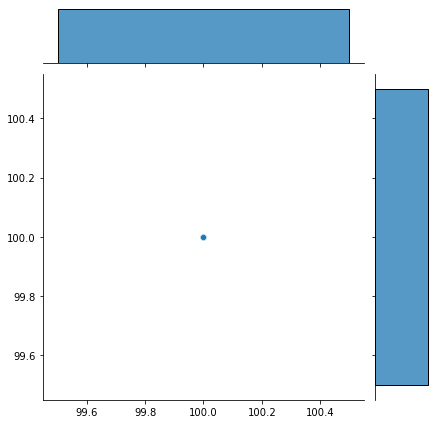

In [19]:
sns.jointplot(dim1,dim2)

In [20]:
image_shape = (int(round(np.mean(dim1))),int(round(np.mean(dim2))),3)
image_shape 

(100, 100, 3)

In [21]:
from tensorflow import keras
model = keras.models.load_model('Models\\flag_model_6-21-21')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 128)       7

In [23]:
from tensorflow.keras.preprocessing import image

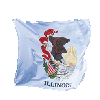

In [43]:
flag_path = 'illinois_test.png'

in_image = image.load_img(flag_path, target_size = image_shape)
in_image

In [44]:
in_image_array = image.img_to_array(in_image)
in_image_array = np.expand_dims(in_image_array, axis= 0)
max_index_row = np.argmax(model.predict(in_image_array), axis=1)
df.iloc[max_index_row]

,Country,ImageURL
20,Massachusetts,https://upload.wikimedia.org/wikipedia/commons...
